In [3]:
# IMPORTING MY MUCH NEEDED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib

In [7]:
# READING THE DATASET
thedataset = pd.read_csv("D:\\PLP_LEARNING\\ASSIGNMENTS\\PYTHON\\WEEK_7\\vehicle_price_prediction.csv")

In [11]:
# VIEWING MY DATASET's FIRST 5 ROWS
thedataset.head(5)

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [15]:
# CHECKING THE NUMBER OF NULL VALUES IN THE DATASET PER COLUMN
null_count = thedataset.isnull().sum()
print(null_count)

make                     0
model                    0
year                     0
mileage                  0
engine_hp                0
transmission             0
fuel_type                0
drivetrain               0
body_type                0
exterior_color           0
interior_color           0
owner_count              0
accident_history    750133
seller_type              0
condition                0
trim                     0
vehicle_age              0
mileage_per_year         0
brand_popularity         0
price                    0
dtype: int64


In [27]:
# SINCE TOO MANY RECORDS HAVE NULL VALUES IN THE 'accident_history' column, I SHALL IMPUTE THE VALUES RANDOMLY
# CREATING MY LIST OF THE CURRENT CHOICES
mychoices = ['None','Minor','Major']
# IDENTIFYING THE ROWS WITH NULL VALUES
null_count2 = thedataset['accident_history'].isnull()
# GENERATING CHOICES FOR EACH NULL VALUE
random_choices = np.random.choice(mychoices , size = null_count2.sum())
# APPLYING THE RANDOM CHOICES TO THE DATAFRAME
thedataset.loc[null_count2, 'accident_history'] = random_choices

In [29]:
# CHECKING THE DATASET ONCE MORE TO SEE IF THE MODIFICATION WAS DONE CORRECTLY
null_count3 = thedataset.isnull().sum()
print(null_count3)

make                0
model               0
year                0
mileage             0
engine_hp           0
transmission        0
fuel_type           0
drivetrain          0
body_type           0
exterior_color      0
interior_color      0
owner_count         0
accident_history    0
seller_type         0
condition           0
trim                0
vehicle_age         0
mileage_per_year    0
brand_popularity    0
price               0
dtype: int64


In [33]:
thedataset.describe()

,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,price
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2017.453816,112660.126464,235.664301,3.477846,7.585987,14540.674200,0.040001,20329.302593
std,3.902285,72088.236925,93.614773,1.544856,3.829534,6108.901522,0.000234,13644.467189
min,2000.000000,500.000000,90.000000,1.000000,1.000000,33.333333,0.039318,1500.000000
25%,2015.000000,57654.000000,162.000000,2.000000,5.000000,10487.633523,0.039842,10324.527500
50%,2018.000000,103331.000000,215.000000,4.000000,7.000000,14688.118056,0.040022,17864.740000
75%,2020.000000,157865.000000,300.000000,5.000000,10.000000,18685.942308,0.040148,27601.402500
max,2025.000000,300000.000000,581.000000,5.000000,25.000000,55391.000000,0.040484,93422.090000


TESTING MY FIRST HYPOTHESIS WHICH IS :
"THE LOWER THE MILEAGE, THE HIGHER THE PRICE OF THE VEHICLE; HOLDING ALL OTHER FACTORS CONSTANT

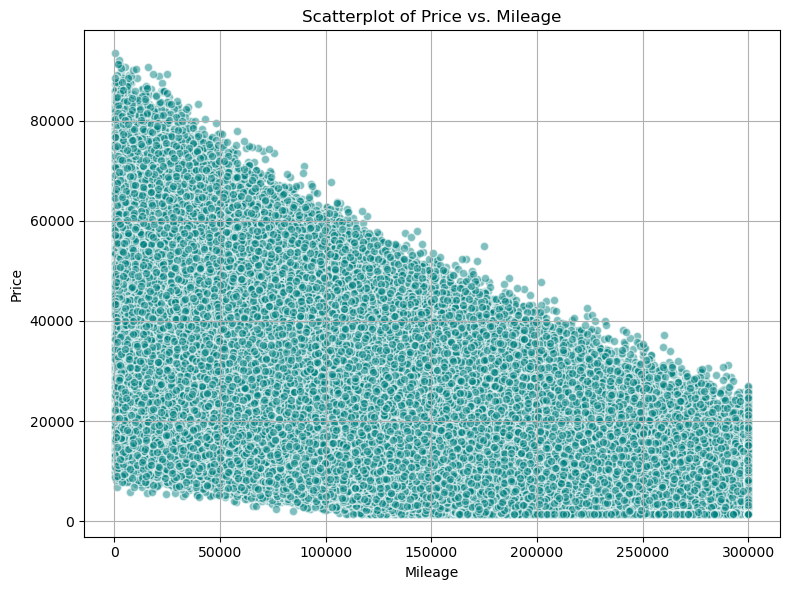

In [37]:
import matplotlib.pyplot as plt

# Scatterplot: Mileage vs. Price
plt.figure(figsize=(8,6))
plt.scatter(thedataset['mileage'], thedataset['price'], alpha=0.5, color='teal', edgecolors='w')

plt.title('Scatterplot of Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

THE RESULTS ABOVE PORTRAY A DOWNWARD TREND WHERE PRICE SEEMS TO DECREASE AS MILEAGE INCREASES

I SHALL NOW CREATE BAR CHARTS PORTRAYING BRAND POPULARITY SCORES FOR EACH BRAND PROVIDED BY THE DATASET

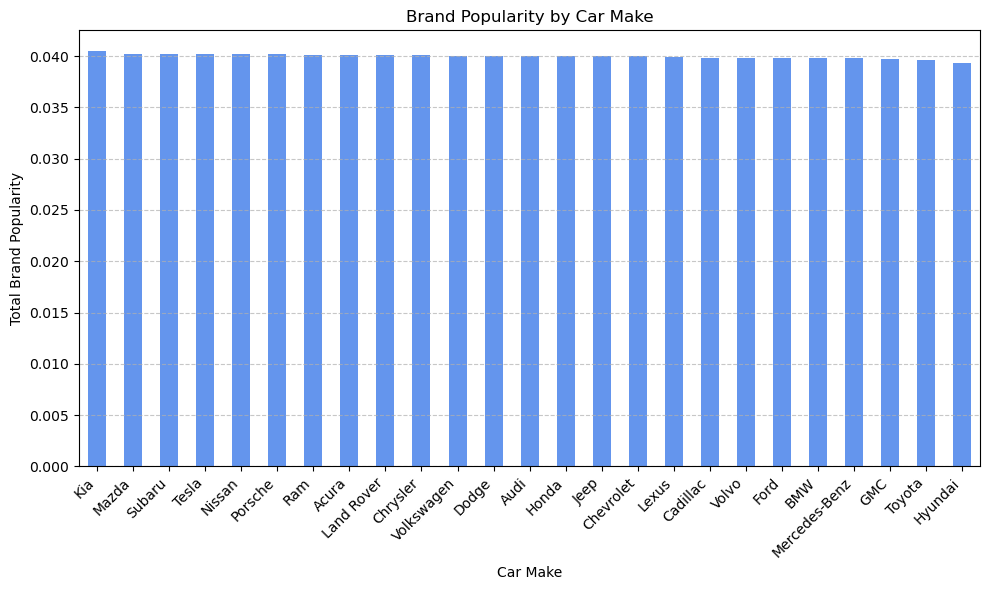

In [52]:
# Grouping and summing brand popularity by car make
popularity_by_make = thedataset.groupby('make')['brand_popularity'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10,6))
popularity_by_make.plot(kind='bar', color='cornflowerblue')

plt.title('Brand Popularity by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Total Brand Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

CREATING A BOX PLOT TO SHOW THE DISTRIBUTION OF HORSEPOWER PER FUEL TYPE

C:\Users\chris\AppData\Local\Temp\ipykernel_7032\1930735560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='engine_hp', data=thedataset, palette='Set2')


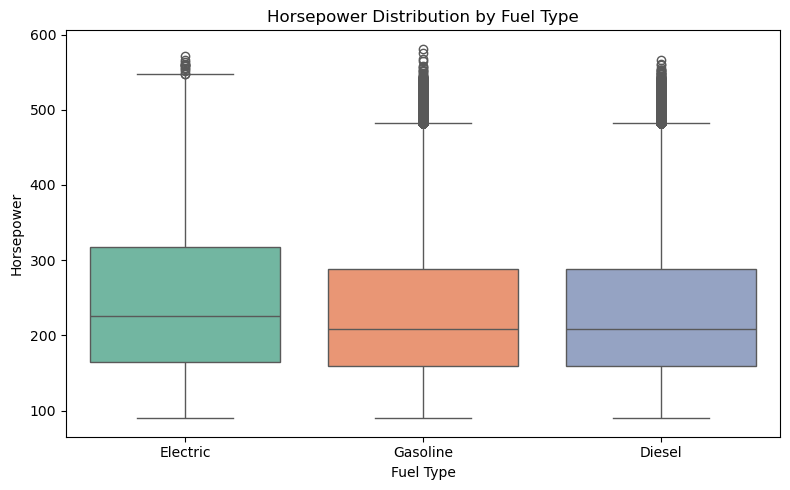

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='fuel_type', y='engine_hp', data=thedataset, palette='Set2')
plt.title('Horsepower Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Horsepower')
plt.tight_layout()
plt.show()

CREATING A HISTOGRAM SHOWING THE DISTRIBUTION OF CAR PRICES

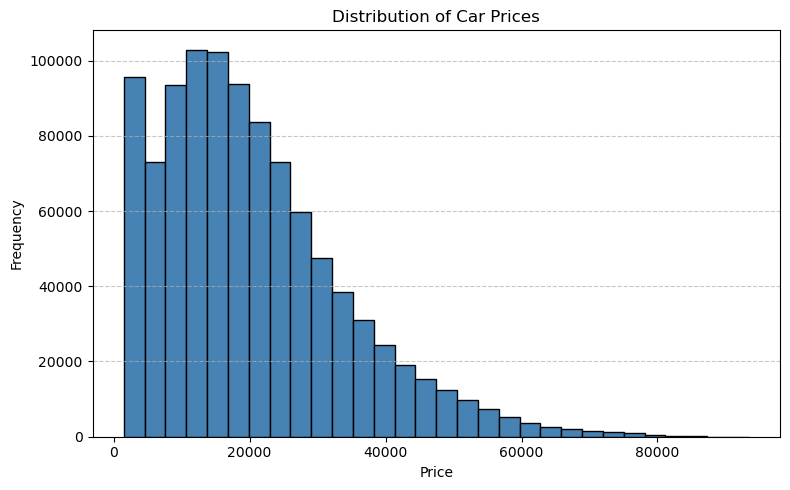

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(thedataset['price'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()